In [640]:
from ultralytics import YOLO
from xml.dom import minidom
import cv2
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil
import numpy as np
import pandas as pd
import cv2


import sys
# adding to the path variables the one folder higher (locally, not changing system variables)
#sys.path.append("..")
import warnings
import mlflow

#from modeling.config import EXPERIMENT_NAME
#TRACKING_URI = open("../.mlflow_uri").read().strip()

import glob
import random
# Set the seed for reproducibility
random.seed(42)

In [106]:
def view_image(img_path, title = 'Title'):
    #imgocv = cv2.imread(img_path)
    #img_rgb = cv2.cvtColor(imgocv, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(20,15))
    plt.imshow(img_path)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [361]:
''' 
path_to_yolo = '../models/yolov8x.pt'
yolo_model = YOLO(path_to_yolo)

'''

## Train test split => For the folder of desire (processed_path)

In [130]:
''' 
# Paths and settings
processed_path = '../data/PKLot/Sunny_most_empty/'

original_path = os.path.join(processed_path,'labels_txt')
image_source = os.path.join(processed_path, 'images')

train_path = os.path.join(processed_path, 'train')
val_path = os.path.join(processed_path, 'val')
test_path = os.path.join(processed_path, 'test')

'''

In [131]:
def save_files(files, im_source, destination_images, destination_labels):
    for file_path in files:
        # Extract file name without extension
        file_name = os.path.splitext(os.path.basename(file_path))[0]

        # Define paths for images and labels
        image_source_path = os.path.join(im_source, f"{file_name}.jpg")  # Assuming images have the same name as the labels with a different extension
        label_source_path = file_path

        image_destination_path = os.path.join(destination_images, f"{file_name}.jpg")
        label_destination_path = os.path.join(destination_labels, f"{file_name}.txt")

        # Copy or move image and label files to the destination
        shutil.copy(image_source_path, image_destination_path)  # Change to shutil.move if you want to move instead of copy
        shutil.copy(label_source_path, label_destination_path)

In [132]:
# Create necessary directories
'''
os.makedirs(os.path.join(train_path, 'images'), exist_ok=True)
os.makedirs(os.path.join(train_path, 'labels'), exist_ok=True)
os.makedirs(os.path.join(val_path, 'images'), exist_ok=True)
os.makedirs(os.path.join(val_path, 'labels'), exist_ok=True)
os.makedirs(os.path.join(test_path, 'images'), exist_ok=True)
os.makedirs(os.path.join(test_path, 'labels'), exist_ok=True)

'''

In [133]:
'''
# Get all txt files and split them
txt_files = glob.glob(os.path.join(original_path, '*.txt'))
random.shuffle(txt_files)

train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

train_split = int(train_ratio * len(txt_files))
val_split = int((train_ratio + val_ratio) * len(txt_files))

train_files = txt_files[:train_split]
val_files = txt_files[train_split:val_split]
test_files = txt_files[val_split:]

# Process training, validation, and test files (same as before, but now includes selected_class)
save_files(train_files, image_source, os.path.join(train_path, 'images'), os.path.join(train_path, 'labels'))
save_files(val_files, image_source, os.path.join(val_path, 'images'), os.path.join(val_path, 'labels'))
save_files(test_files, image_source, os.path.join(test_path, 'images'), os.path.join(test_path, 'labels'))

'''



## Make the puc_sunny.yaml

In [49]:
# Make this file manually in the following format
''' 
path = '../data/PKLot/PKLot_Non_Occupied/PUC/Sunny/

Format:
-------------
train: ../train/images
val: ../val/images

nc: 2
names: ['cat','dog']

--------------
'''

" \npath = '../data/PKLot/PKLot_Non_Occupied/PUC/Sunny/\n\nFormat:\n-------------\ntrain: ../train/images\nval: ../val/images\n\nnc: 2\nnames: ['cat','dog']\n\n--------------\n"

## Training phase of YOLO 

In [152]:
#yaml_path = '../data/CNR-Park_EXT_yolov8-2/data.yaml'

In [57]:
#%pip install mlflow

In [154]:
# Using pretrained models
#yolo8x_train_pretrained_model = YOLO('../runs/detect/train66/weights/last.pt')

In [422]:
''' 
yolo8x_train_pretrained_model.train(
    data=yaml_path, 
    epochs=2, 
    batch=8,
    translate = 0.1,  # image translation (+/- fraction)
    augment = True,
    scale = 0.2,  # image scale (+/- gain)
    shear = 0.2,  # image shear (+/- deg) from -0.5 to 0.5
    #perspective = 0.1,  # image perspective (+/- fraction), range 0-0.001
    flipud = 0.7,  # image flip up-down (probability)
    fliplr = 0.5,  # image flip left-right (probability)
    mosaic = 0.3,  # image mosaic (probability)
    mixup = 0.1, # image mixup (probability) ),
)

'''

' \nyolo8x_train_pretrained_model.train(\n    data=yaml_path, \n    epochs=2, \n    batch=8,\n    translate = 0.1,  # image translation (+/- fraction)\n    augment = True,\n    scale = 0.2,  # image scale (+/- gain)\n    shear = 0.2,  # image shear (+/- deg) from -0.5 to 0.5\n    #perspective = 0.1,  # image perspective (+/- fraction), range 0-0.001\n    flipud = 0.7,  # image flip up-down (probability)\n    fliplr = 0.5,  # image flip left-right (probability)\n    mosaic = 0.3,  # image mosaic (probability)\n    mixup = 0.1, # image mixup (probability) ),\n)\n\n'

## Make predictions

In [633]:
#folder_path = "../data/CNR-Park_EXT_yolov8-2/train/images"
folder_path = '../data/PKLot/Sunny_most_empty/test/images'
#folder_path = '../data/PKLot/PKLot_only_occupied/UFPR04/Cloudy'
#folder_path = '../data/PKLot/PKLot_only_occupied/UFPR04/Rainy'

In [634]:
# Get a list of all files in the folder
#all_files = os.listdir(os.path.join(folder_path,'images/'))
all_files = os.listdir(folder_path)

# Filter only .jpg files
jpg_files = [file for file in all_files if file.lower().endswith(".jpg")]

# Select a random .jpg file
random_images = random.sample(jpg_files, 5)  # take random sample of images

# image
# image
paths_to_images = []
for each in random_images:
    paths_to_images.append(os.path.join(folder_path,each))

In [635]:
# image from web
#image_random_test = cv2.imread('../data/random_test/test_car_lot_1.jpeg')

In [636]:
# Make the prediction

path_to_best_trained_model = '../runs/detect/train70/weights/best.pt'
best_trained_model = YOLO(path_to_best_trained_model)

def yolo_predict(model, img_path):
    pred = model(
        source=img_path, 
        save= False, 
        conf= 0.05,  # object confidence threshold for detection
        iou= 0.3,    # intersection over union (IoU) threshold for NMS
    )
    return pred

In [637]:
def show_predict(result):
    # Show the results for one image
    for r in result:
        im_array = r.plot(line_width=1)  # plot a BGR numpy array of predictions
        im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
        plt.figure(figsize=(15,10))
        plt.axis('off')
        plt.imshow(im)


image 1/1 /Users/thisal_weerasekara/neufische/pklot/notebooks/../data/PKLot/Sunny_most_empty/test/images/2013-03-02_08_45_03.jpg: 384x640 37 empty_carlots, 133.3ms
Speed: 2.5ms preprocess, 133.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /Users/thisal_weerasekara/neufische/pklot/notebooks/../data/PKLot/Sunny_most_empty/test/images/2012-09-16_10_48_06.jpg: 384x640 161 empty_carlots, 118.6ms
Speed: 1.1ms preprocess, 118.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /Users/thisal_weerasekara/neufische/pklot/notebooks/../data/PKLot/Sunny_most_empty/test/images/2012-09-16_13_13_12.jpg: 384x640 137 empty_carlots, 106.0ms
Speed: 1.3ms preprocess, 106.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /Users/thisal_weerasekara/neufische/pklot/notebooks/../data/PKLot/Sunny_most_empty/test/images/2012-12-23_09_40_05.jpg: 384x640 32 empty_carlots, 113.2ms
Speed: 1.4ms preprocess, 113.2ms inference, 

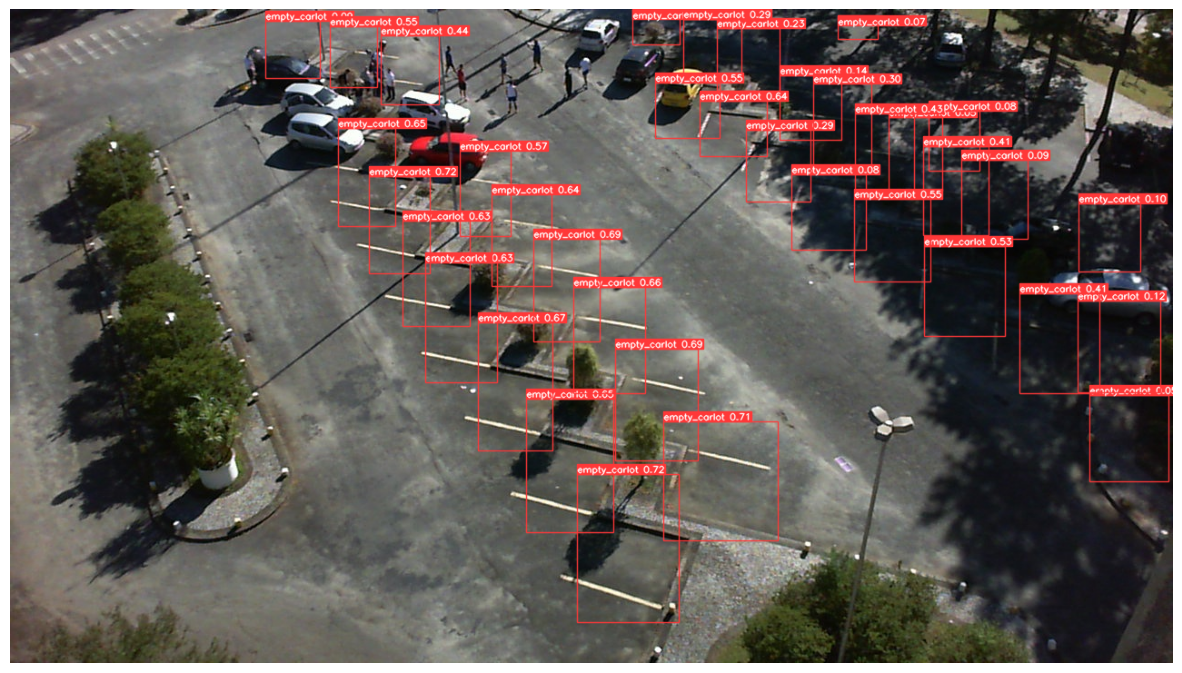

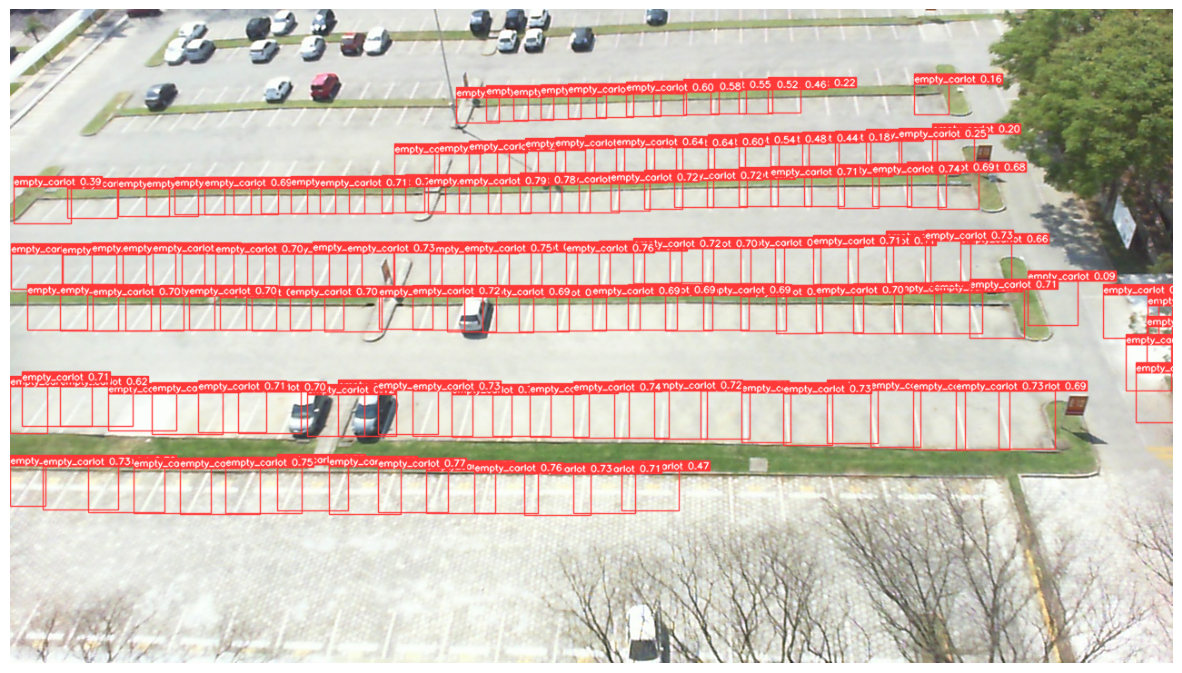

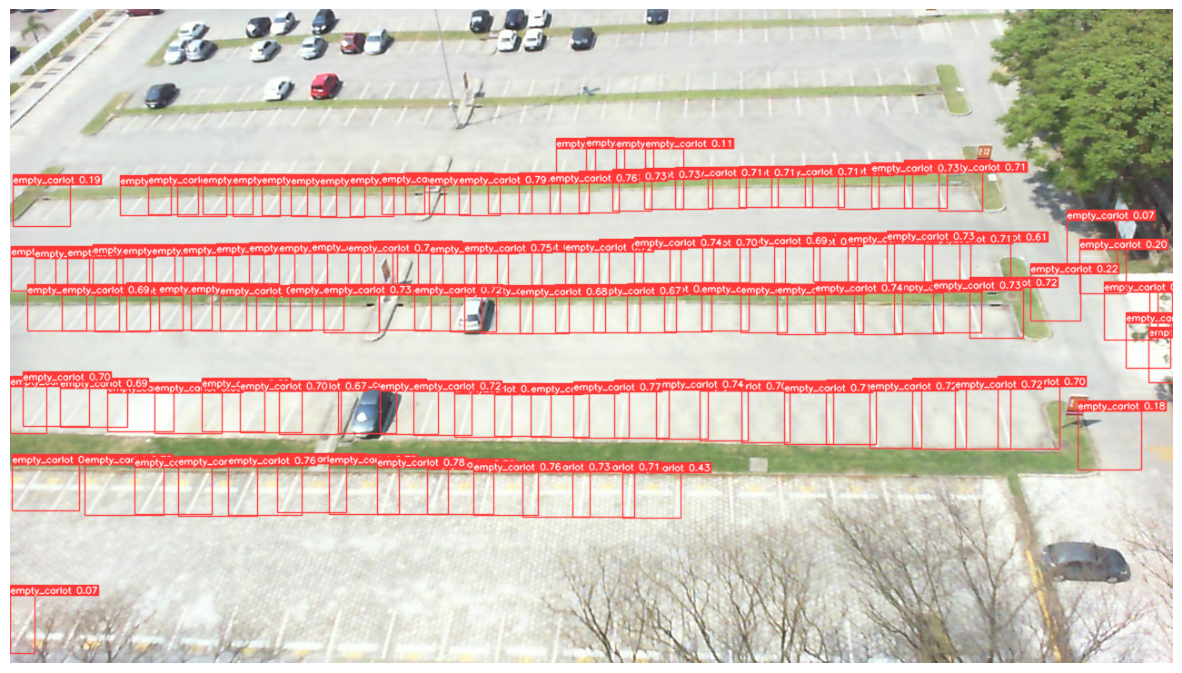

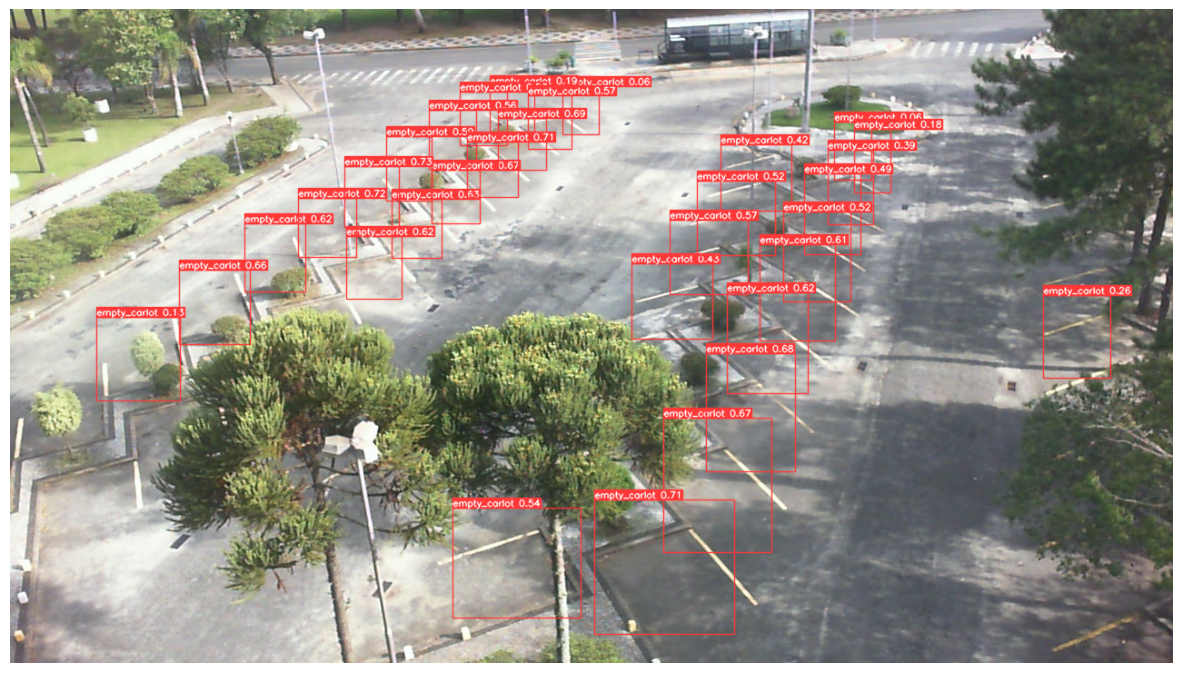

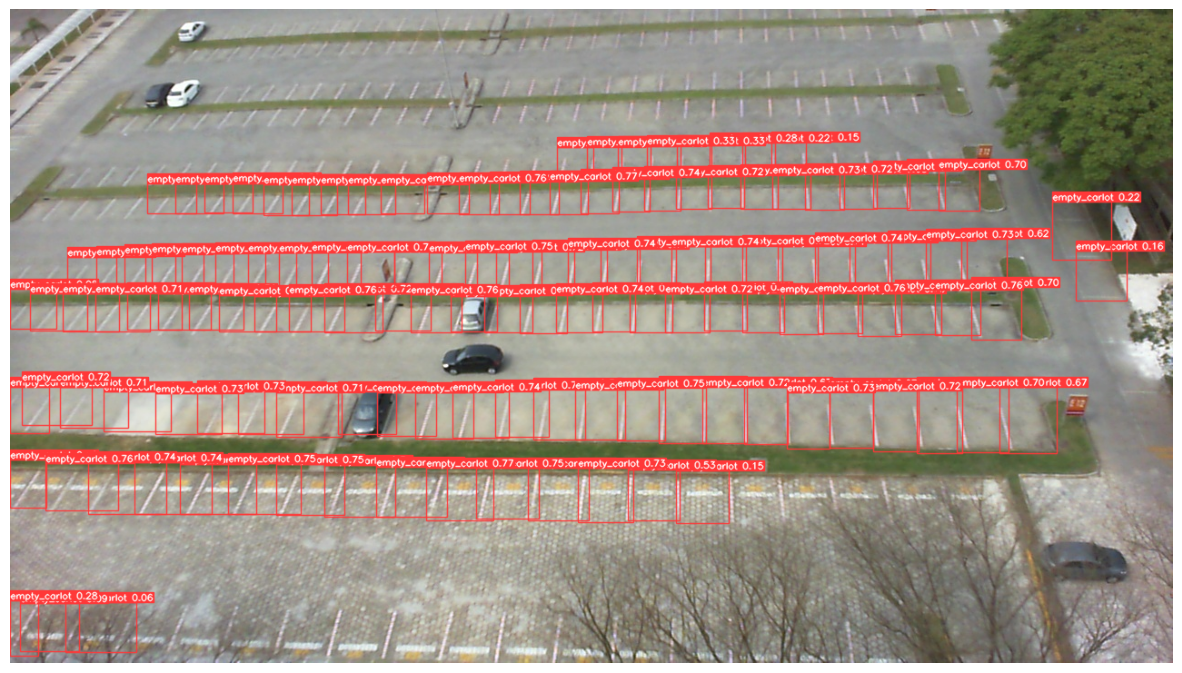

In [638]:
for each in paths_to_images:
    pred = yolo_predict(best_trained_model, each)
    show_predict(pred)

In [639]:
for each in paths_to_images:
    pred = yolo_predict(best_trained_model, each)
    show_predict(pred)

''' 
for r in result:
    print(r.boxes)

'''

' \nfor r in result:\n    print(r.boxes)\n\n'

## Export bounding boxes to .xml format

In [642]:
# predictionon one image
img_path = paths_to_images[0]

prediction = yolo_predict(best_trained_model, img_path)


image 1/1 /Users/thisal_weerasekara/neufische/pklot/notebooks/../data/PKLot/Sunny_most_empty/test/images/2013-03-02_08_45_03.jpg: 384x640 37 empty_carlots, 354.9ms
Speed: 56.7ms preprocess, 354.9ms inference, 17.1ms postprocess per image at shape (1, 3, 384, 640)


In [666]:
img_path

'../data/PKLot/Sunny_most_empty/test/images/2013-03-02_08_45_03.jpg'

In [655]:
def write_boxes_to_xml(image_path, result, output_path):
    if len(result) == 0:
        print(f"No bounding boxes found in {image_path}. Skipping XML creation.")
        return
    
    image_name = image_path.split('/')[-1]  # Extracting the image name from the path
    annotation = ET.Element("annotation")
    
    filename = ET.SubElement(annotation, "filename")
    filename.text = image_name
    
    size = ET.SubElement(annotation, "size")
    width = ET.SubElement(size, "width")
    width.text = str(result.orig_shape[1])  # Assuming 'orig_shape' attribute is available in result
    height = ET.SubElement(size, "height")
    height.text = str(result.orig_shape[0])
    
    for idx, box in enumerate(result.boxes.xyxy):  # Access 'xyxy' attribute of the 'boxes' object
        obj = ET.SubElement(annotation, "object")
        name = ET.SubElement(obj, "name")
        name.text = f"object_{idx}"  # You can customize the object names
        
        bndbox = ET.SubElement(obj, "bndbox")
        xmin = ET.SubElement(bndbox, "xmin")
        xmin.text = str(int(box[0]))
        ymin = ET.SubElement(bndbox, "ymin")
        ymin.text = str(int(box[1]))
        xmax = ET.SubElement(bndbox, "xmax")
        xmax.text = str(int(box[2]))
        ymax = ET.SubElement(bndbox, "ymax")
        ymax.text = str(int(box[3]))
    
    xml_str = ET.tostring(annotation, encoding="unicode")
    xml_str_pretty = minidom.parseString(xml_str).toprettyxml(indent="  ")

    with open(output_path, "w") as xml_file:
        xml_file.write(xml_str_pretty)
    print(f"XML file saved at {output_path}")


In [ ]:
output_xml_folder = '../data/PKLot/prediction_xml_folder'
os.makedirs(output_xml_folder)

In [665]:
output_path = os.path.join(output_xml_folder, img_path[-23:-4]+'.xml')
for r in prediction:
    write_boxes_to_xml(img_path, r, output_path)

XML file saved at ../data/PKLot/prediction_xml_folder/2013-03-02_08_45_03.xml
